In [183]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.1
Uninstalling scikit-learn-1.2.1:
  Successfully uninstalled scikit-learn-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [225]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import accuracy_score
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
from sklearn import datasets
import random
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.inspection import DecisionBoundaryDisplay

In [185]:
glass = pd.read_csv('/glass.csv',header = None)
glass

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [186]:
print(glass.isnull().any())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool


In [187]:
print(glass.describe())

               0           1           2           3           4           5   \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

               6           7           8           9           10  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739 

In [188]:
col_n = glass.iloc[0]
for i in col_n:
  print(type(i))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


We have dropped columns 0 because it is index and 10 because it is target

In [189]:
Y = glass[10]
X = glass.drop([0,10], axis = 'columns')


In [190]:
X

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [191]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: 10, Length: 214, dtype: int64

In [192]:
corr_glass = X.corr() 
print(corr_glass)

          1         2         3         4         5         6         7  \
1  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
2 -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
3 -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
4 -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
5 -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
6 -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
7  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
8 -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
9  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   

          8         9  
1 -0.000386  0.143010  
2  0.326603 -0.241346  
3 -0.492262  0.083060  
4  0.479404 -0.074402  
5 -0.102151 -0.094201  
6 -0.042618 -0.007719  
7 -0.112841  0.124968  
8  1.000000 -0.058692  
9 -0.058692  1.000000  


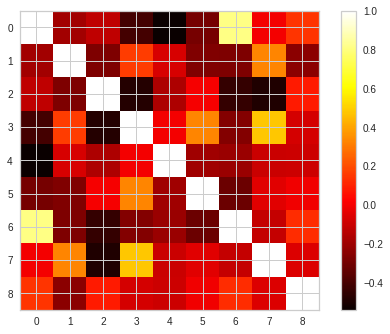

In [193]:
plt.imshow(corr_glass, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

<AxesSubplot:>

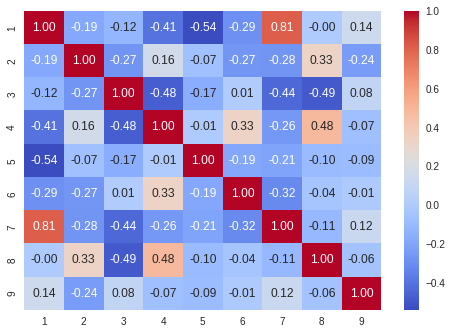

In [194]:
sns.heatmap(corr_glass, cmap='coolwarm', annot=True, fmt=".2f")


We drop column 7 due to its high correlation between Column 1 and Column 7 our threshold for this correlation was 0.7

In [195]:
X = X.drop([7],axis = 'columns')

In [196]:
X

,1,2,3,4,5,6,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.0
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,1.57,0.0


          1         2         3         4         5         6         8  \
1  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833 -0.000386   
2 -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087  0.326603   
3 -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.492262   
4 -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958  0.479404   
5 -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.102151   
6 -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.042618   
8 -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618  1.000000   
9  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719 -0.058692   

          9  
1  0.143010  
2 -0.241346  
3  0.083060  
4 -0.074402  
5 -0.094201  
6 -0.007719  
8 -0.058692  
9  1.000000  


<AxesSubplot:>

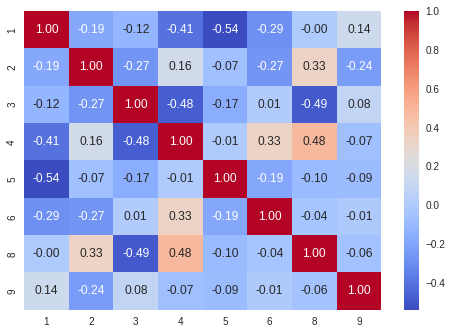

In [197]:
corr_glass = X.corr() 
print(corr_glass)
sns.heatmap(corr_glass, cmap='coolwarm', annot=True, fmt=".2f")


In [198]:
model = KMeans(n_clusters=6, random_state=0)
labels = model.fit_predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


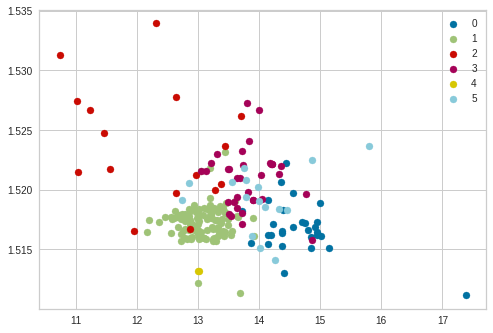

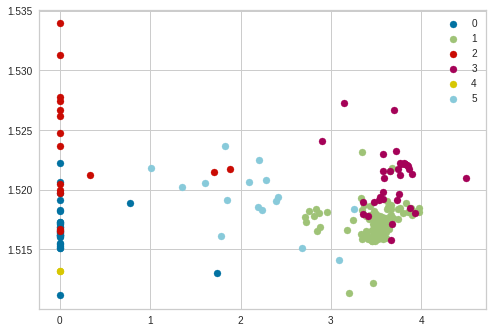

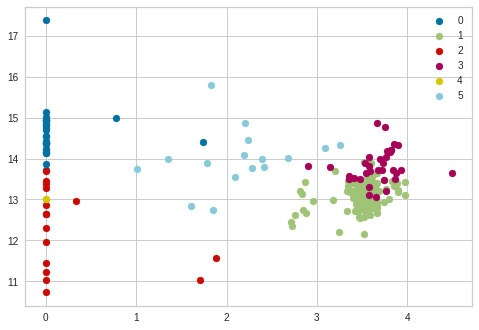

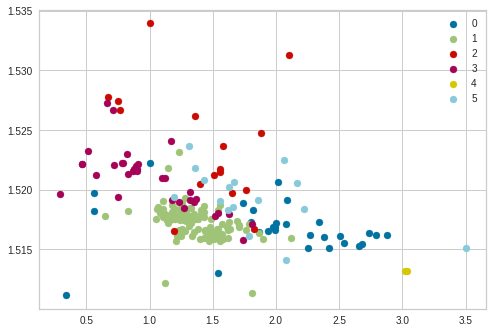

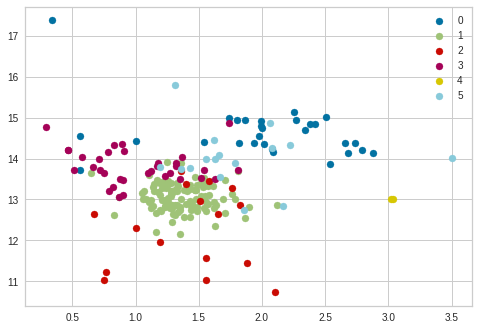

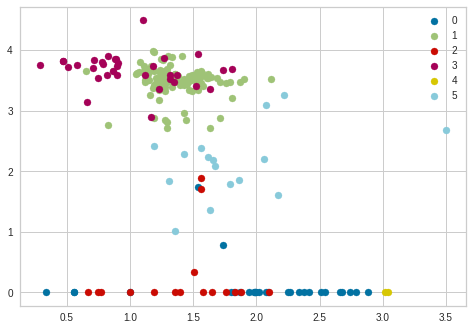

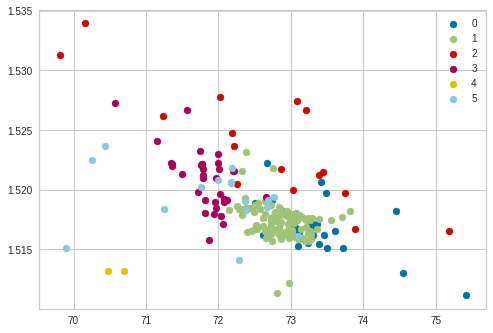

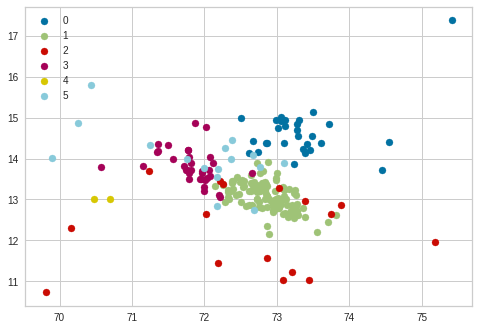

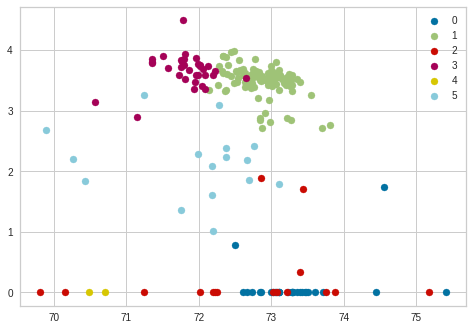

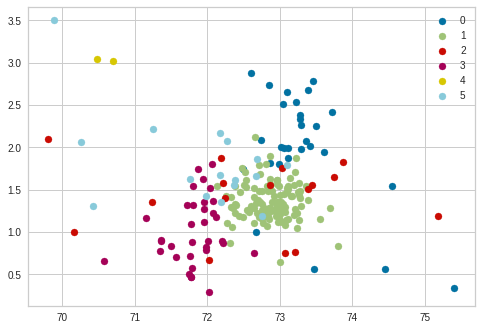

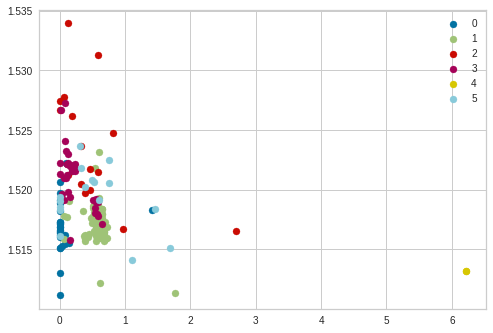

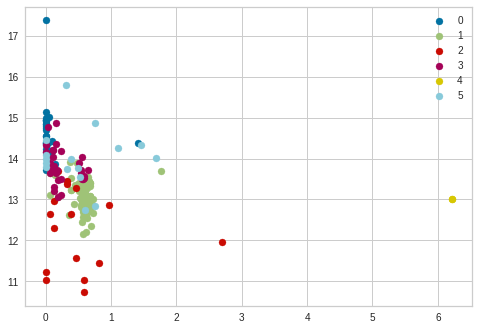

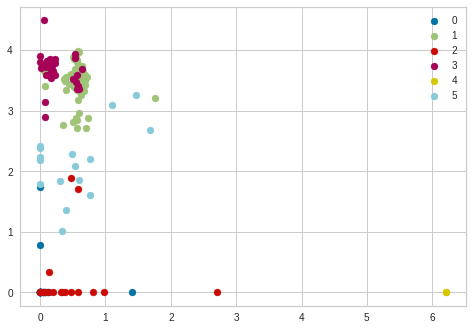

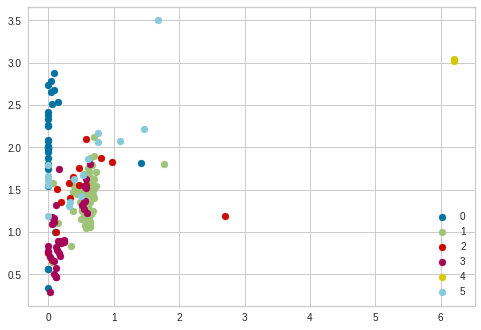

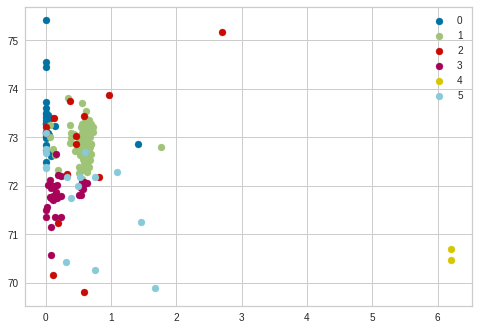

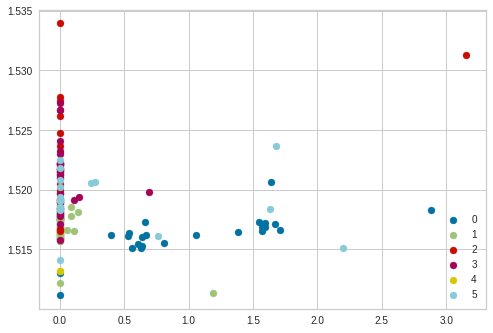

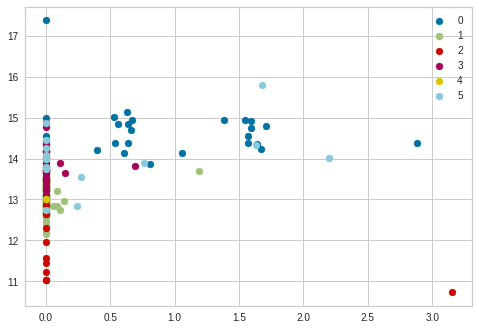

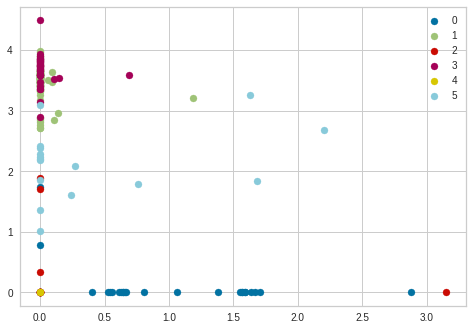

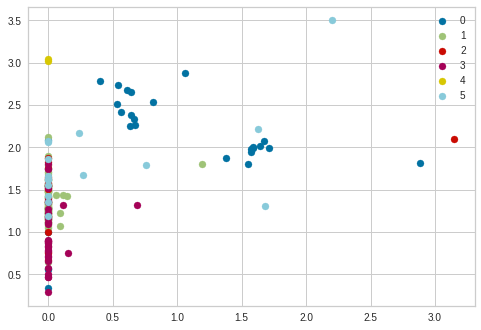

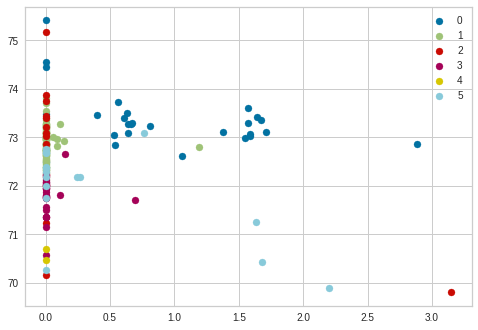

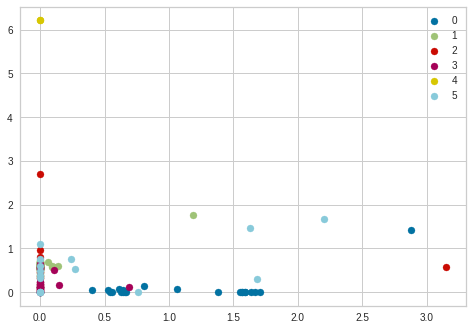

In [199]:
u_labels = np.unique(labels)

#plotting the results:

for j in range (7):
  for k in range (7):
    if j <= k:
      continue
    else:
      for i in u_labels:
          plt.scatter(X[labels == i].iloc[:,j] , X[labels == i].iloc[:,k], label = i)
      plt.legend()
      plt.show()

In [200]:
from sklearn.metrics import pairwise_distances
from sklearn import metrics
arr = []
for i in range(2,214):
  kmeans_model = KMeans(n_clusters=i,n_init = 'auto').fit(X)
  labels = kmeans_model.labels_
  arr.append(metrics.silhouette_score(X, labels, metric='euclidean'))

print(arr.index(max(arr))+2)
print(arr.index(min(arr))+2)

2
213


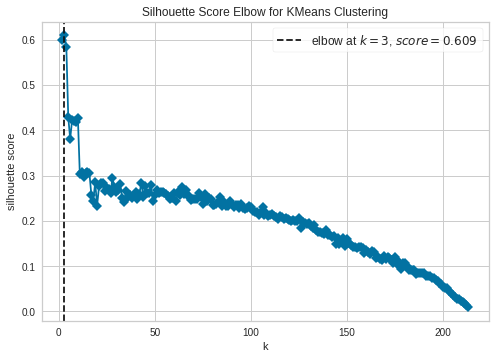

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [201]:
model_elbow = KMeans(n_init = 20)
elbow = KElbowVisualizer(model_elbow, metric='silhouette', timings=False, k=(2,214))

elbow.fit(X)        
elbow.show() 

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [203]:
user_prompt = 0.25
user_enable = True

x_train,x_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)

The best value of k is: 2


<function matplotlib.pyplot.show(close=None, block=None)>

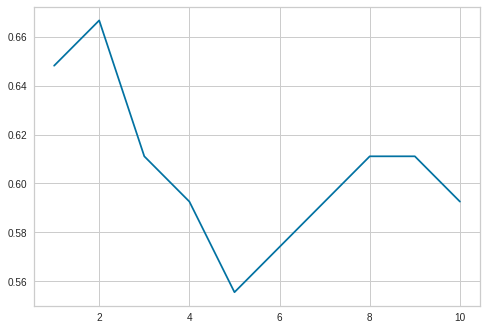

In [204]:
arr = []
for i in range(1,11): 
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  model_bag = BaggingClassifier(estimator=model_knn,n_estimators=100, random_state=0).fit(x_train, y_train)
  y_pred = model_bag.predict(x_test)
  acc_bag = accuracy_score(y_test,y_pred)
  arr.append(acc_bag)
i = np.linspace(1,10,10)
m = arr.index(max(arr))+1
print('The best value of k is:',m)
plt.plot(i,arr)
plt.show

In [205]:
wholesale = pd.read_csv('/Wholesale_customers_data.csv')
wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [206]:
print(wholesale.isnull().any())

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool


In [207]:
print(wholesale.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [208]:
continuous_features = ['Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']
print(continuous_features)
scaler = StandardScaler()
wholesale[continuous_features] = scaler.fit_transform(wholesale[continuous_features])
wholesale

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,1,3,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,1,3,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,2,3,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,1,3,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [209]:
Y1 = wholesale.Channel.astype(int)
Y2 = wholesale.Region.astype(int)
X = wholesale.drop(["Region","Channel"], axis = 'columns')

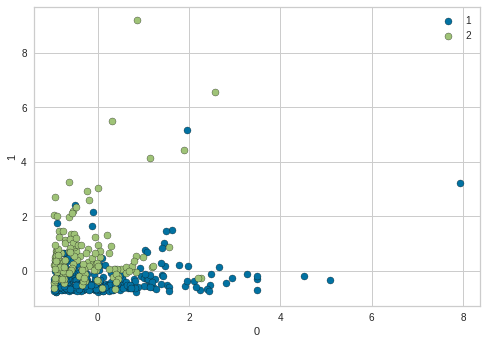

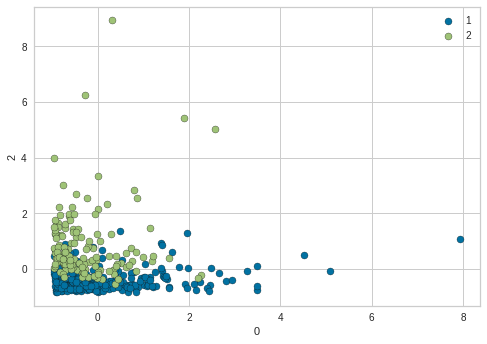

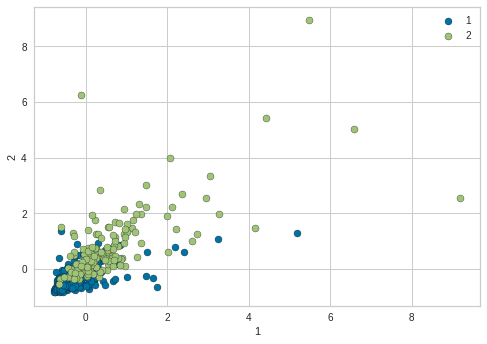

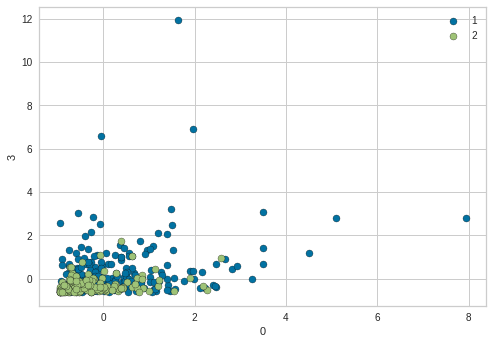

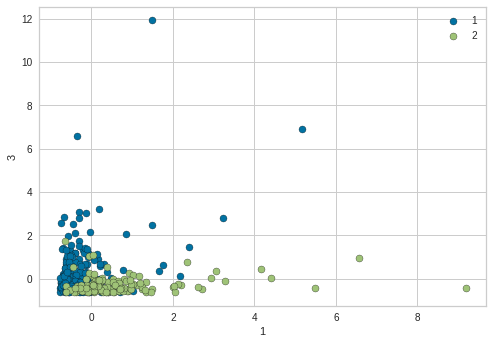

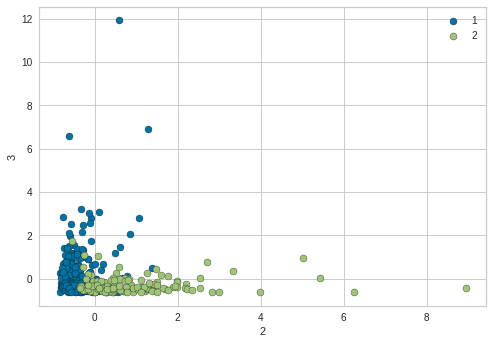

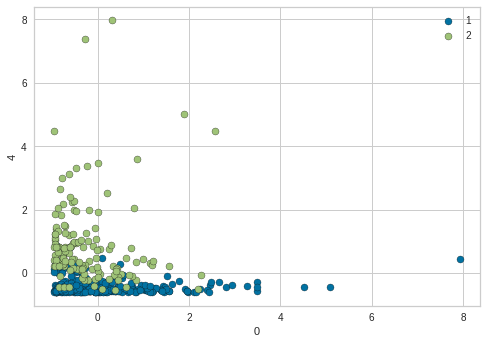

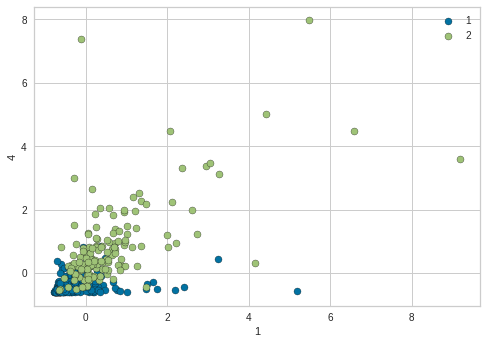

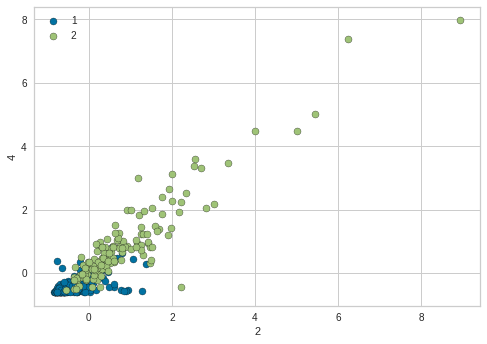

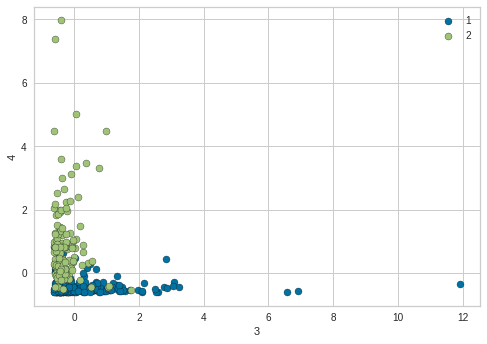

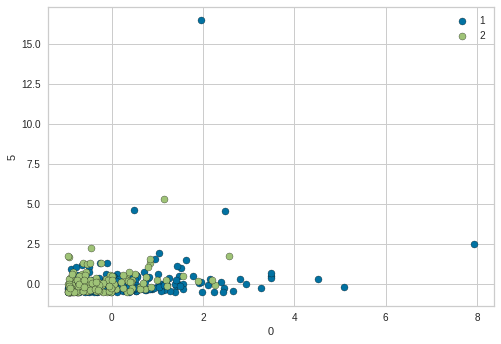

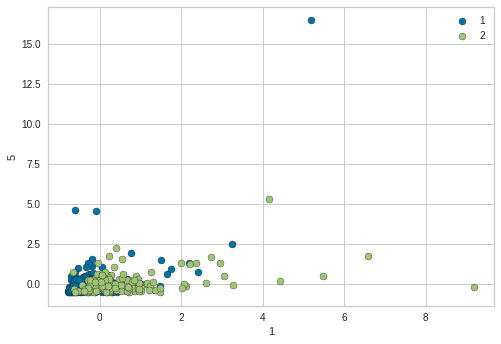

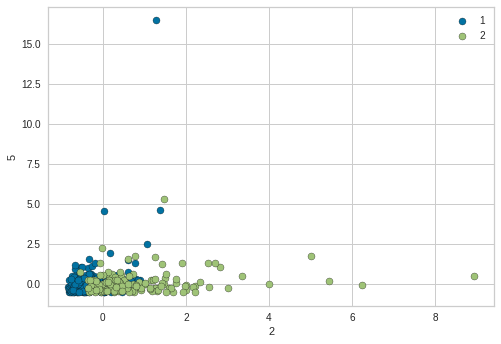

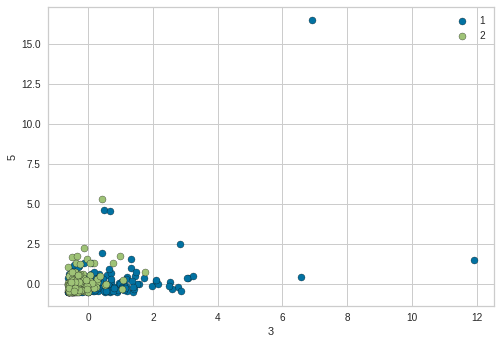

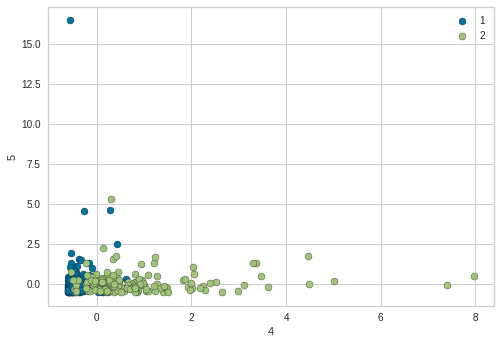

In [210]:
labels = Y1
u_labels = np.unique(labels)

#plotting the results:

for j in range (6):
  for k in range (6):
    if j <= k:
      continue
    else:
      for i in u_labels:
          plt.scatter(X[labels == i].iloc[:,k] , X[labels == i].iloc[:,j], label = i,edgecolor = 'k')
      plt.xlabel(k)
      plt.ylabel(j)
      plt.legend()
      plt.show()

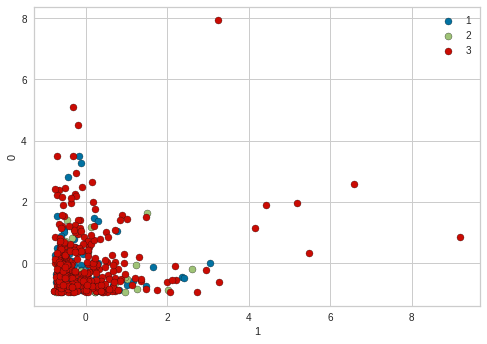

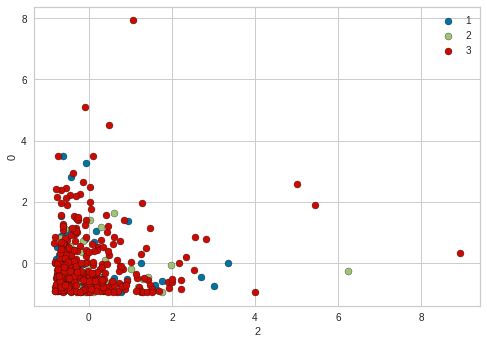

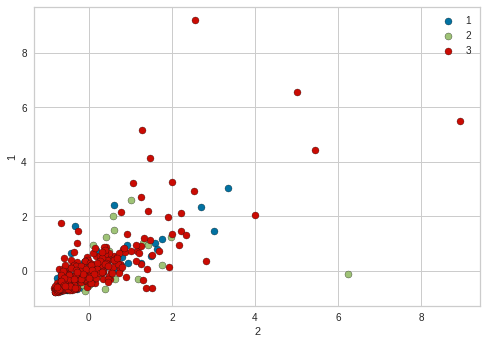

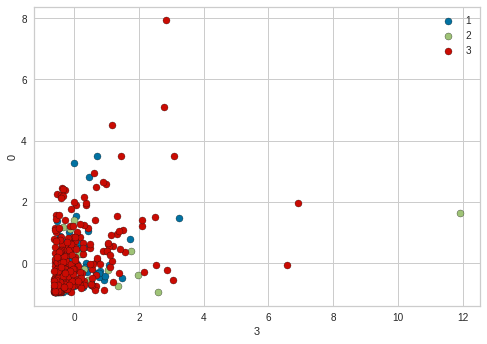

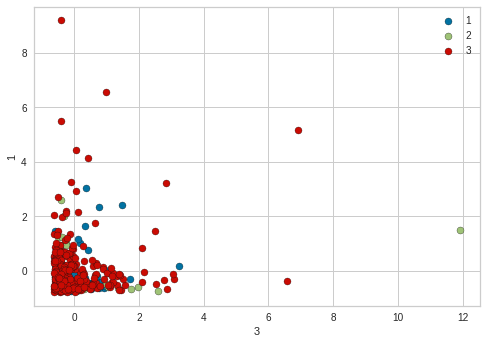

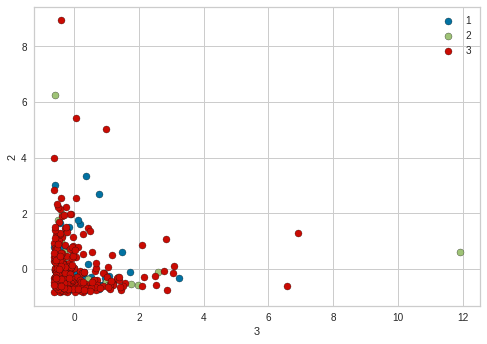

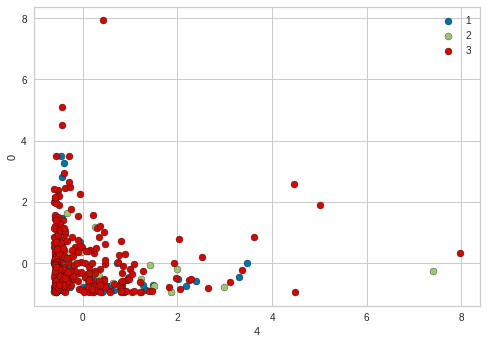

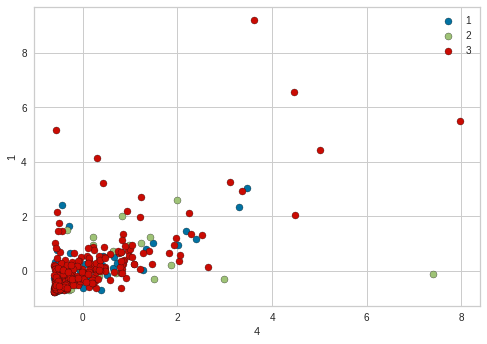

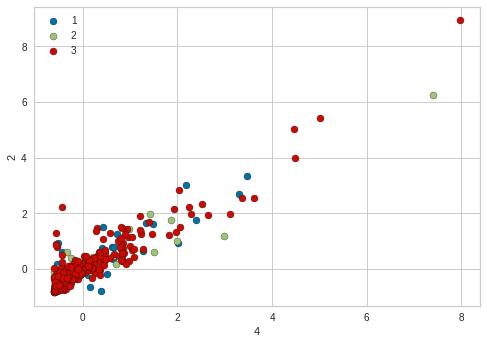

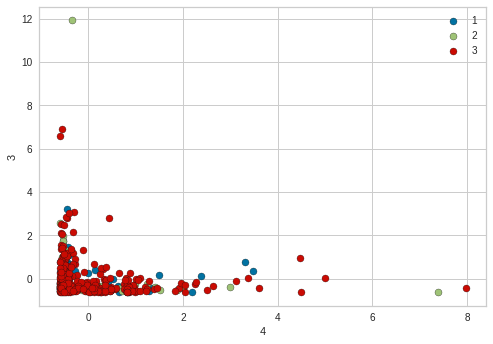

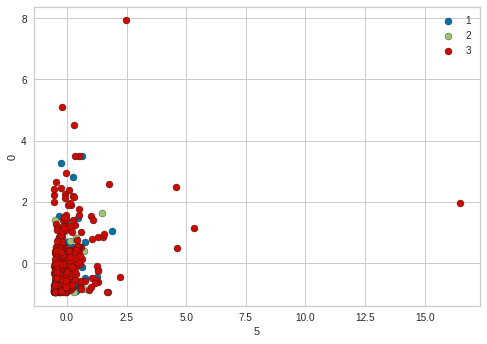

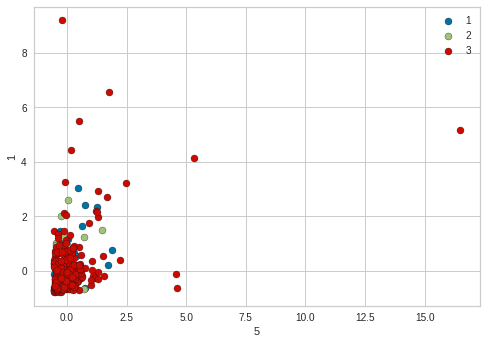

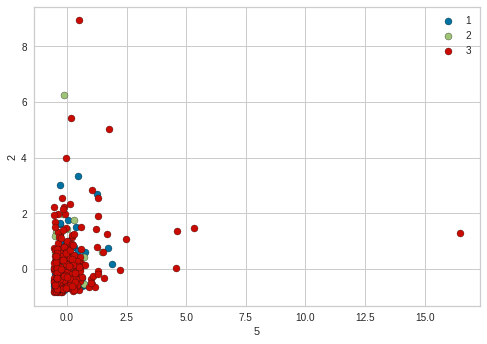

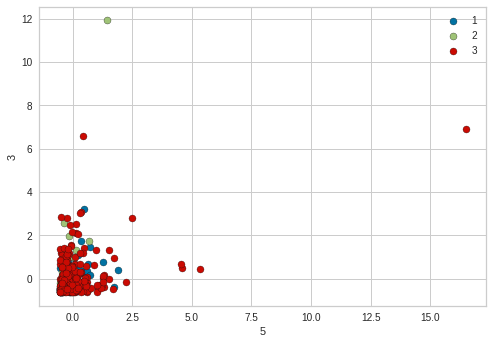

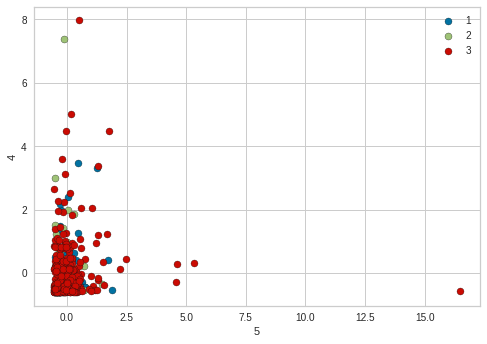

In [211]:
labels = Y2
u_labels = np.unique(labels)

#plotting the results:

for j in range (6):
  for k in range (6):
    if j <= k:
      continue
    else:
      for i in u_labels:
          plt.scatter(X[labels == i].iloc[:,j] , X[labels == i].iloc[:,k], label = i,edgecolor = 'k')
      plt.xlabel(j)
      plt.ylabel(k)
      plt.legend()
      plt.show()

<AxesSubplot:>

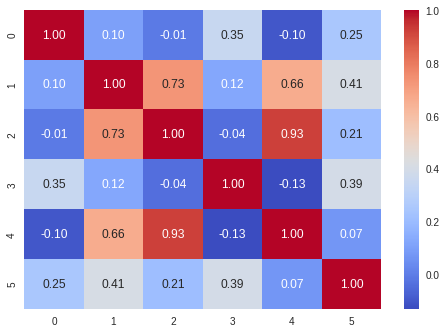

In [212]:
cov_matrix = np.cov(X,rowvar = False)

sns.heatmap(cov_matrix, cmap='coolwarm', annot=True, fmt=".2f")

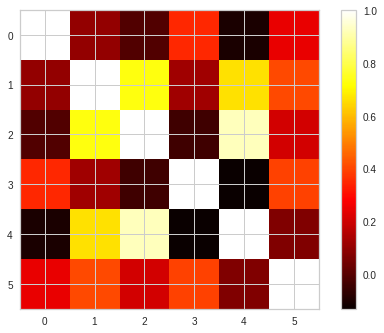

In [213]:
cov_matrix = np.cov(X,rowvar = False)
plt.imshow(cov_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [214]:
X1 = X['Grocery']
X2 = X['Detergents_Paper']

In [215]:
X_res = pd.concat([X1, X2], axis=1)

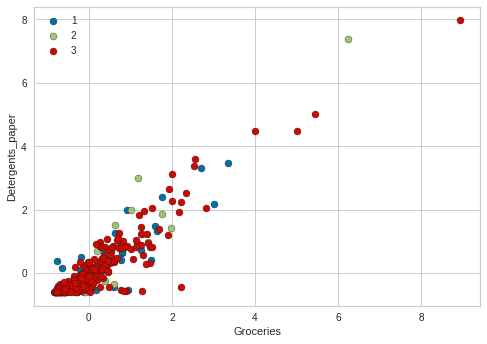

In [216]:
labels = Y2
u_labels = np.unique(labels)
#plotting the results:
for i in u_labels:
  plt.scatter(X_res[labels == i].iloc[:,0] , X_res[labels == i].iloc[:,1], label = i,edgecolor = 'k')
plt.xlabel('Groceries')
plt.ylabel('Detergents_paper')
plt.legend()
plt.show()

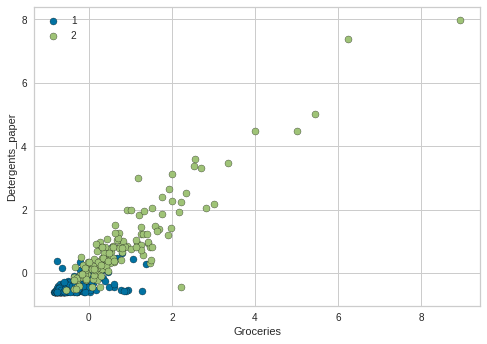

In [217]:
labels = Y1
u_labels = np.unique(labels)
#plotting the results:
for i in u_labels:
  plt.scatter(X_res[labels == i].iloc[:,0] , X_res[labels == i].iloc[:,1], label = i,edgecolor = 'k')
plt.xlabel('Groceries')
plt.ylabel('Detergents_paper')
plt.legend()
plt.show()

In [218]:
from sklearn.cluster import DBSCAN

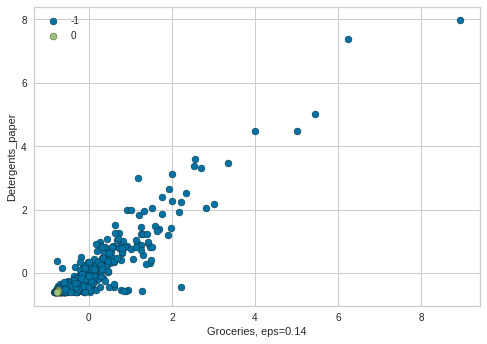

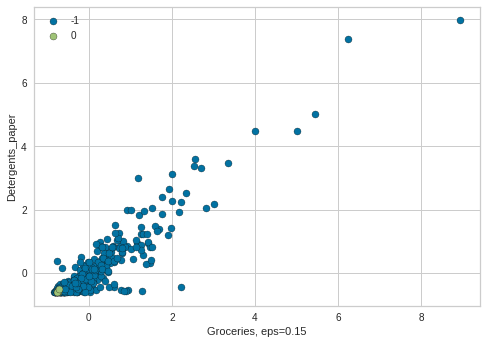

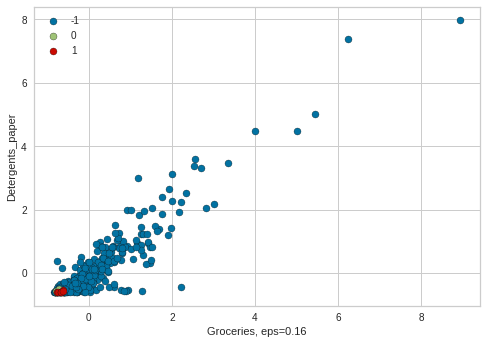

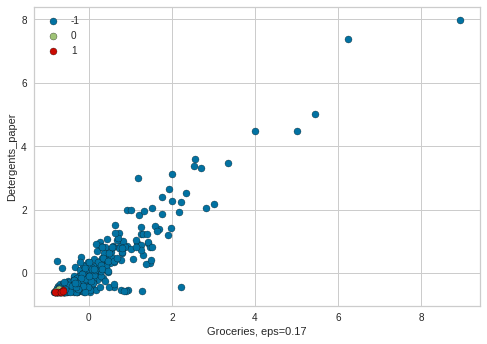

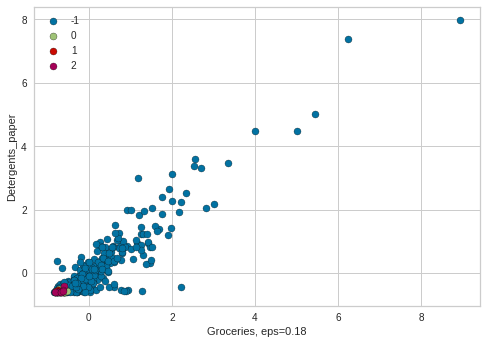

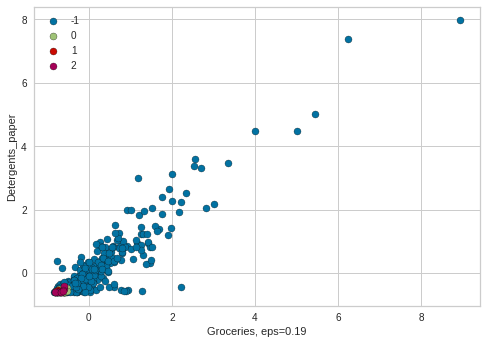

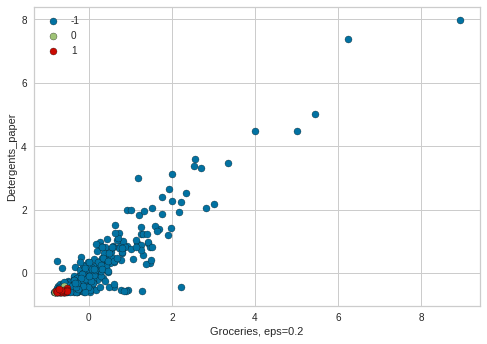

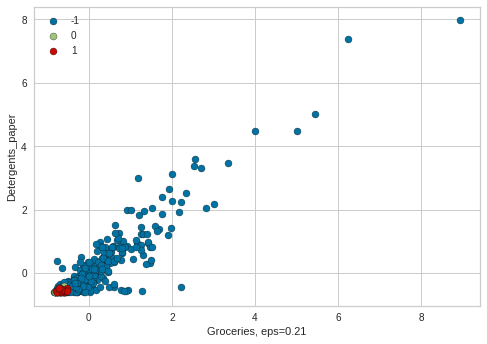

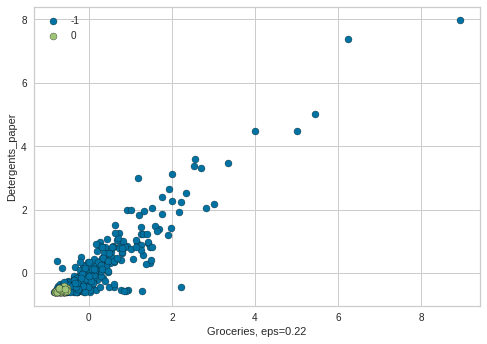

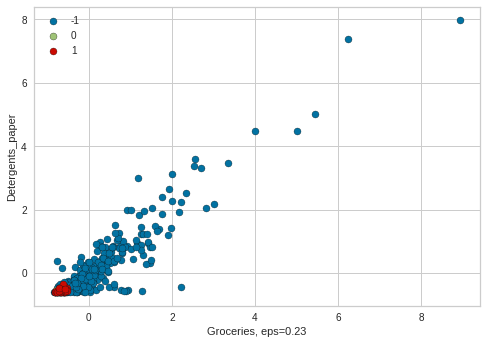

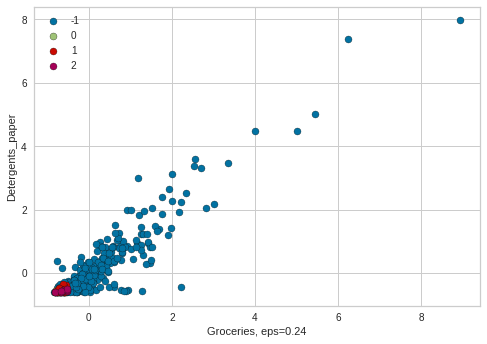

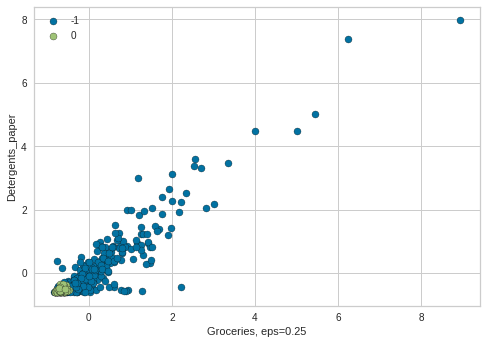

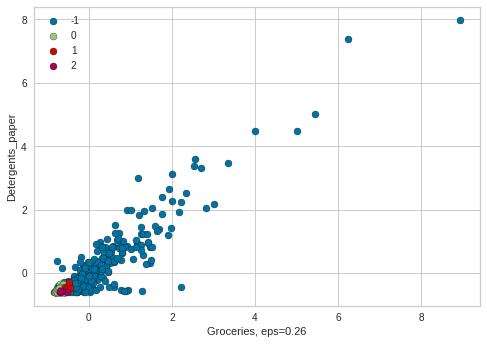

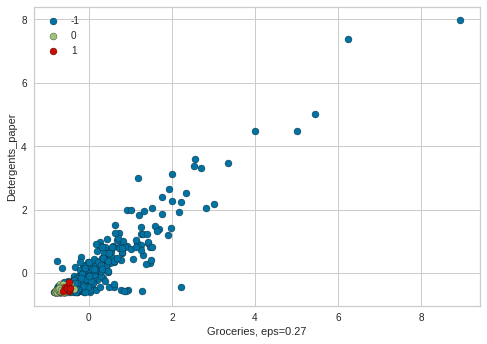

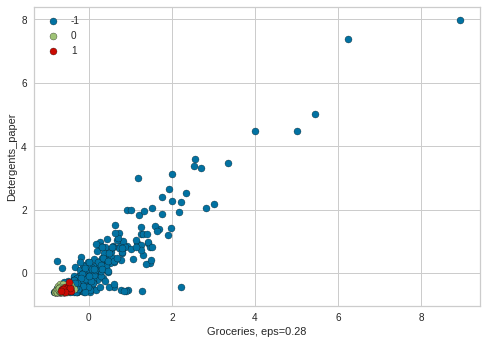

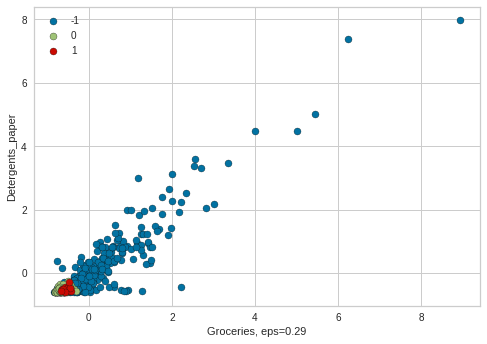

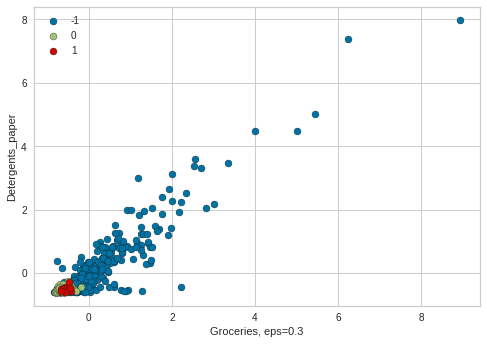

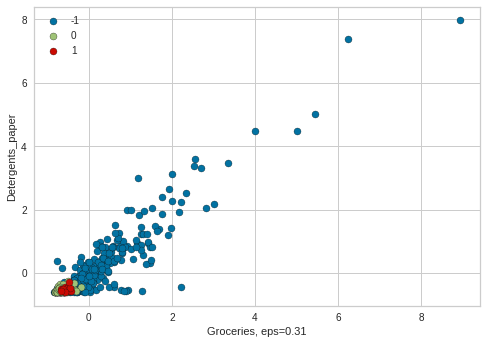

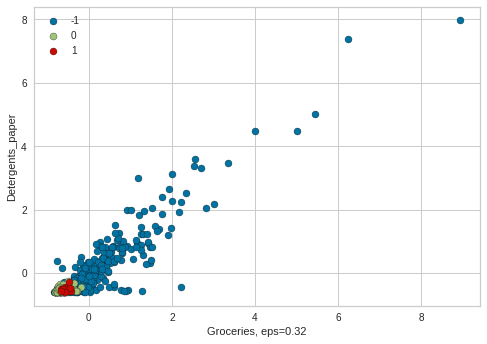

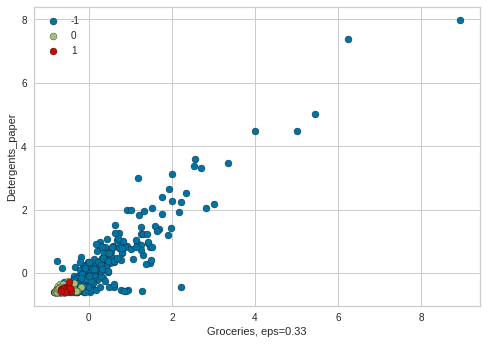

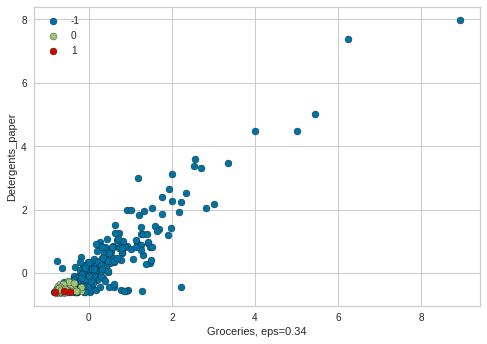

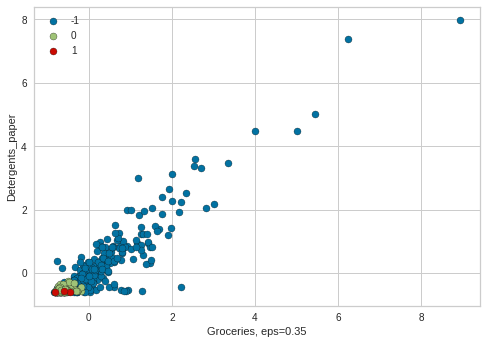

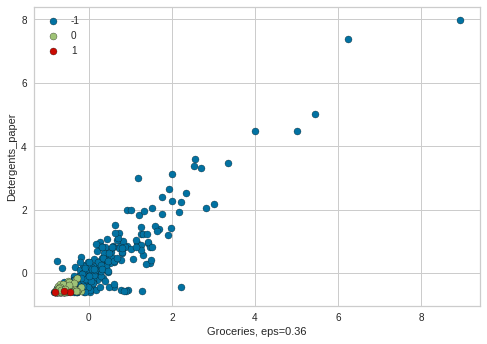

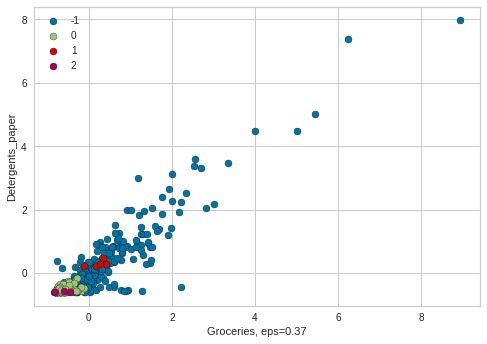

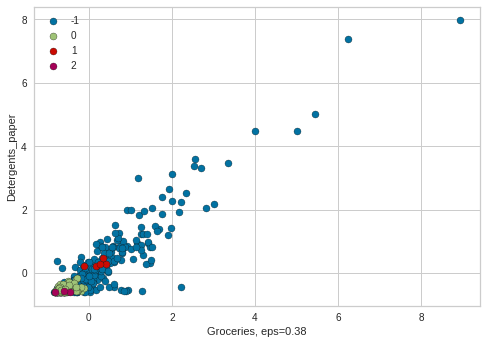

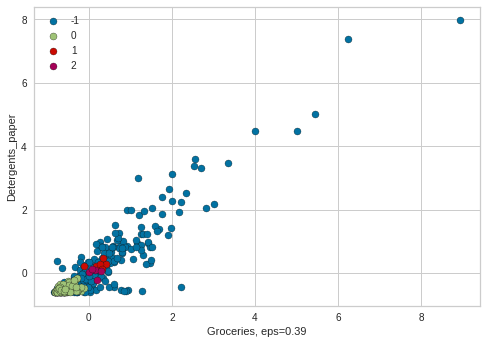

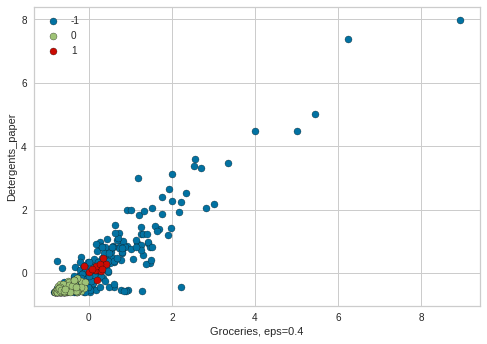

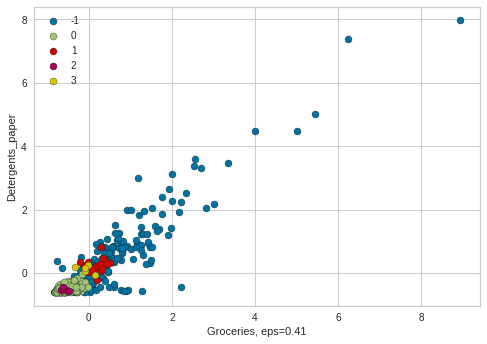

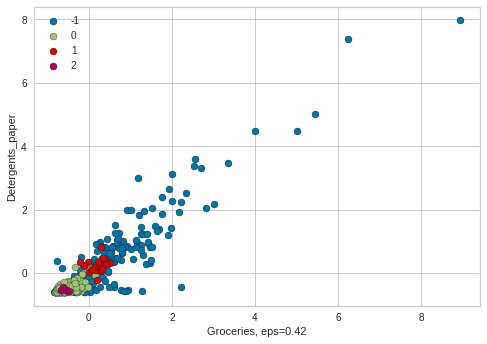

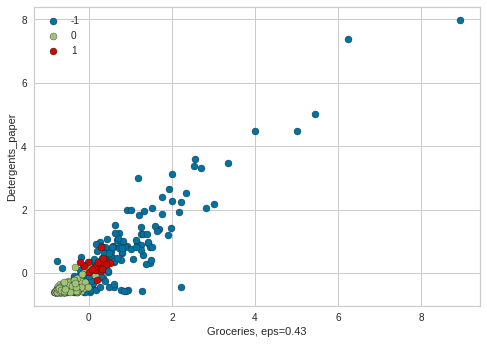

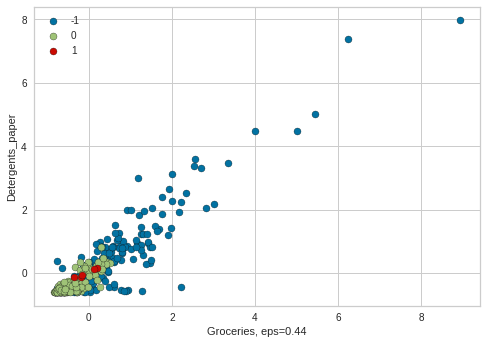

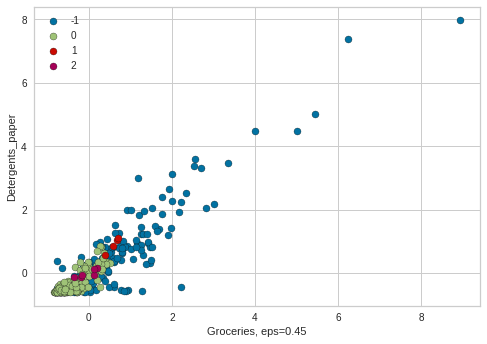

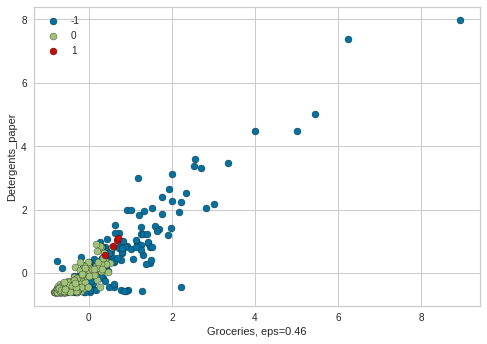

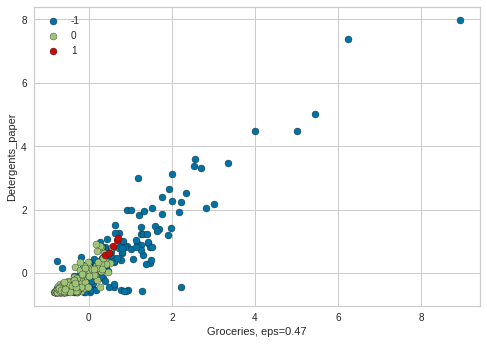

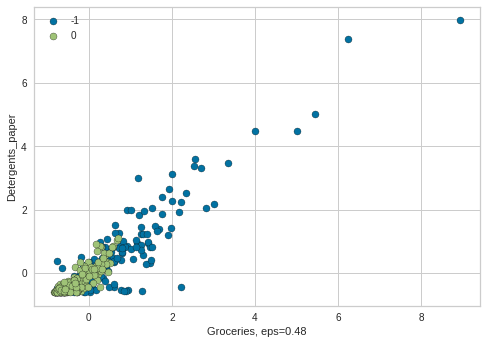

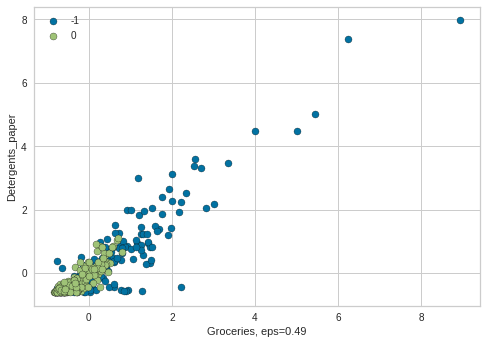

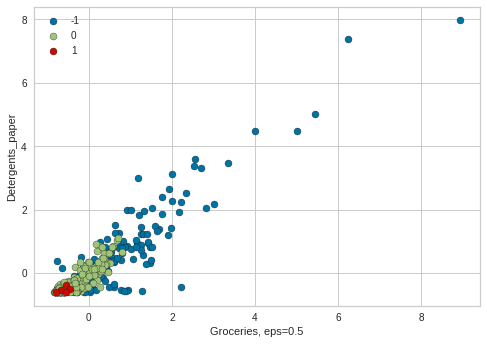

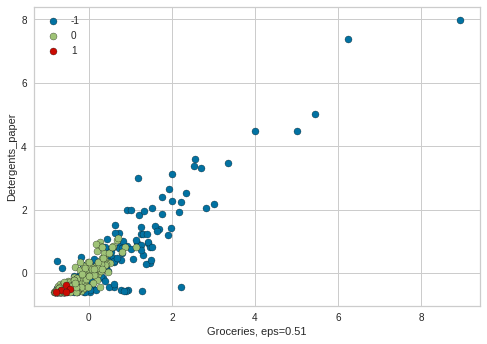

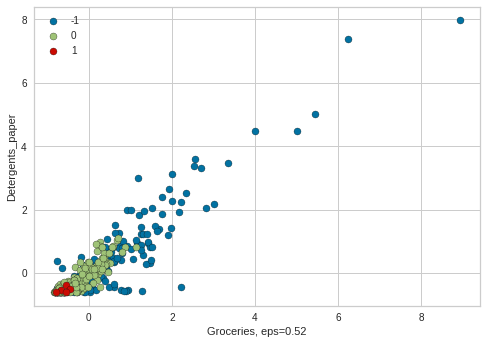

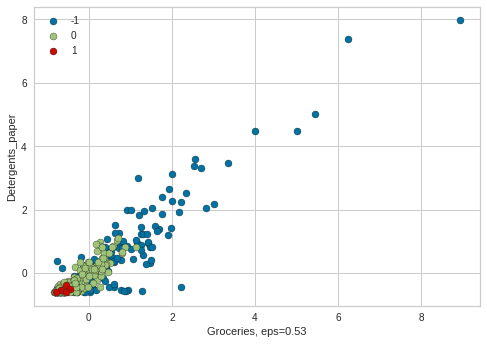

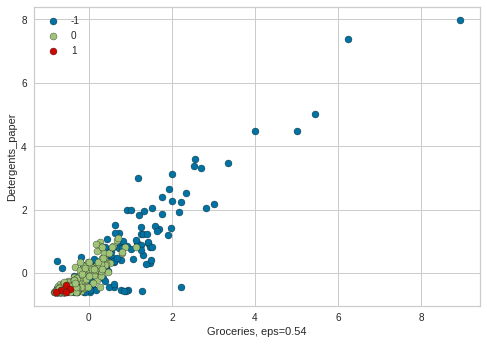

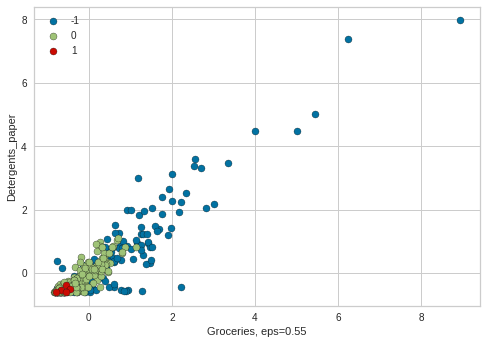

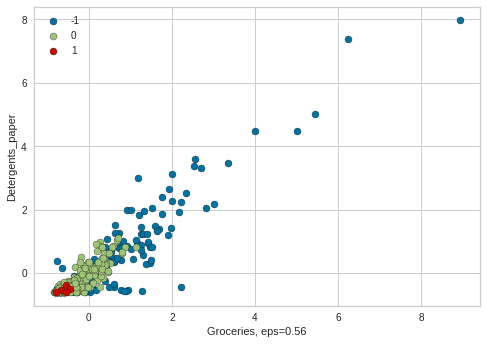

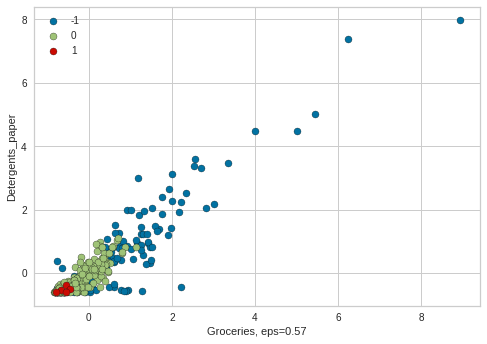

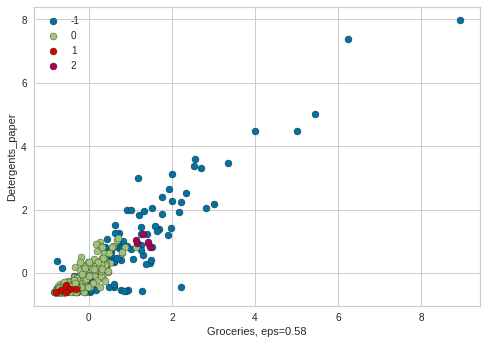

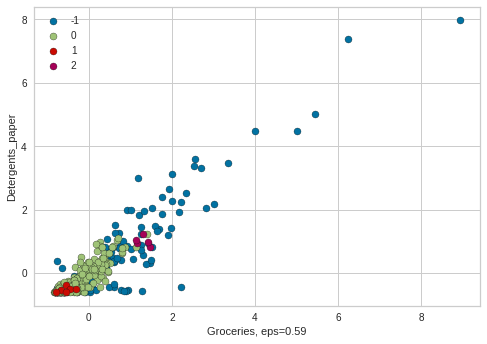

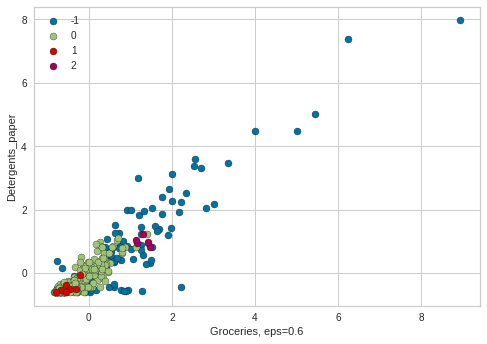

In [219]:
for k in range(14,61):
  model_dbs = DBSCAN(eps = k/100)
  model_dbs.fit(X)
  labels = model_dbs.labels_
  u_labels = np.unique(labels)

  #plotting the results:

  for i in u_labels:
    plt.scatter(X_res[labels == i].iloc[:,0] , X_res[labels == i].iloc[:,1], label = i,edgecolor = 'k')
  string = 'Groceries, eps=' + str(k/100)
  plt.xlabel(string)
  plt.ylabel('Detergents_paper')
  plt.legend()
  plt.show()

In [220]:
user_prompt = 0.25
user_enable = True

x_train,x_test,y_train,y_test = tts(X_res,Y1,test_size=user_prompt,shuffle=user_enable)

The best value of k is: 17
The best accuracy is: 0.9545454545454546


<function matplotlib.pyplot.show(close=None, block=None)>

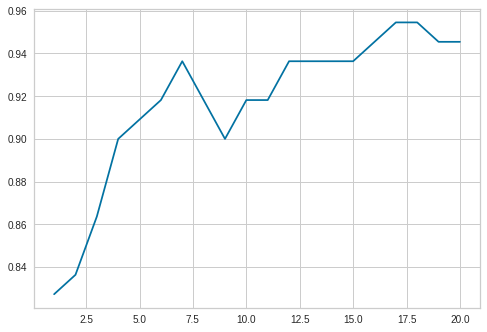

In [222]:
arr = []
for i in range(1,21): 
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  y_pred = model_knn.predict(x_test)
  acc_knn = accuracy_score(y_test,y_pred)
  arr.append(acc_knn)
i = np.linspace(1,20,20)
m = arr.index(max(arr))+1
print('The best value of k is:',m)
print('The best accuracy is:', arr[m-1])
plt.plot(i,arr)
plt.show

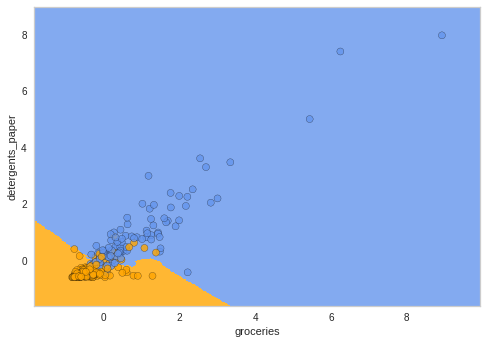

In [233]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]
model_knn = KNeighborsClassifier(n_neighbors=m)
model_knn.fit(x_train,y_train)
disp = DecisionBoundaryDisplay.from_estimator(model_knn, x_train,cmap = cmap_light, response_method="predict",xlabel='groceries',alpha = 0.8, ylabel='detergents_paper',plot_method = 'pcolormesh',grid_resolution = 500)
disp.ax_.scatter(x_train[:, 0], x_train[:, 1],cmap = cmap_light, c=y_train,edgecolor="k",alpha = 0.8)